# Line-search methods

In [69]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100  # parameter for resolution of graphics
import time

v = 2  # variant corresponding to the number of the function below
Maxiter = 200 # Number of iterations
x0 = 2 # Initialization
a = 0   # Lower bound for the plot interval
b = 4   # Upper bound for the plot interval
Tol = 1e-15

InitStep = 1  # initial step
m1 = 0.1   #Parameters
m2 = 0.9

## Various objective functions

In [70]:
def fun(x,v):                   # function definition
    if v==0:
        return 3*(1.5*x-1)**2
    if v==1:
        return x**3-5*x+1
    if v==2:
        return x**4-2*x**3-5*x
    if v==3:
        return np.cos(5*x)-8*x+2.5*x**2
    if v==4:
        return np.cos(5*x)-8*x+1.5*x**2

def der(x,v):                   # first derivative
    if v==0:
        return 3*2*(1.5*x-1)*1.5
    if v==1:
        return 3*x**2-5
    if v==2:
        return 4*x**3-6*x**2-5
    if v==3:
        return -5*np.sin(5*x)-8+2.5*2*x
    if v==4:
        return -5*np.sin(5*x)-8+1.5*2*x


## Algorithm: Generic Line Search

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

 **Initialization:** Start with $t_l=t_r=0$ and pick an initial $t>0$.

 **Iterate:** 
 - **Step 1**
    - **if** (a) then exit: you found a good $t$
    - **if** (b) then $t_r = t$: you found a new upper bound for $t$
    - **if** (c) then $t_l = t$: you found a good new lower bound for $t$
 - **Step 2**
    - **if** no valid $t_r$ exists then choose a new $t>t_r$
    - **else** choose a new $t \in (t_l,t_r)$
   </div>





##  Goldstein-Price


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

Recall the three conditions for the **Goldstein-Price line-search**

$\star$ $m_1,m_2 \in (0,1)$ are chosen constants such that $m_1<0.5$ and $m_2>0.5$.
  
(a) $m_2 q'(0) \leq \frac{q(t)-q(0)}{t} \leq m_1 q'(0)$ (then we have a good $t$)

(b) $m_1q'(0)< \frac{q(t)-q(0)}{t}$ (then $t$ is too big)

(c) $\frac{q(t)-q(0)}{t}<m_2q'(0)$ (then $t$ is too small)
    </div>



Bounds iter  1  are:  0   0
Bounds iter  2  are:  0   4
Bounds iter  3  are:  2.0   4
Bounds iter  4  are:  2.0   3.0
Final descent step= 2.5


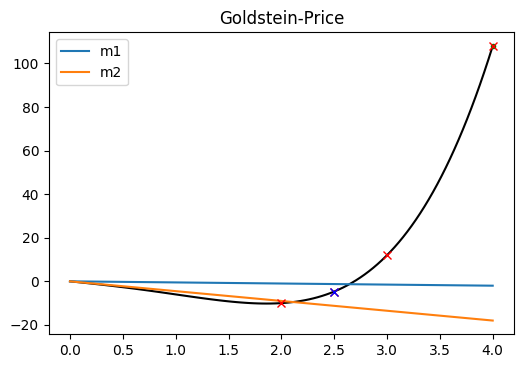

In [71]:
# the inputs are
# q(0), q'(0), m1 and m2
def LinesearchGP(q,dq,m1,m2):    
    tl = 0    # initial lower bound for t
    tr = 0    # initial upper bound for t
    t = b     # upper bound for the plot interval, the initial choice of t
    qp = dq(0,v)  # evaluate q'(0)
    q0 = q(0,v)   # evaluate q(0)
    
    # Plotting
    uplim = max(fun(a,v),fun(b,v))+1   # set limits for the plot window
    dnlim = -3
    t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
    plt.figure()
    plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]
    
    xs = np.linspace(a,b)   
    ys = q0+m1*qp*xs
    ys2 = q0+m2*qp*xs
    plt.plot(xs,ys,label="m1")
    plt.plot(xs,ys2,label="m2")
    # ============
    
    qt = q(t,v)
    plt.plot(t,qt,'.g')
    
    it = 1
    
    while (1==1):
        qt = q(t,v)
        plt.plot(t,qt,'xr')
        print("Bounds iter ",it," are: ",tl," ",tr)
        it = it+1
        # Test the three conditions in the Line search rule
        if ((qt-q0)/t<=(m1*qp)) and ((qt-q0)/t>=(m2*qp)):
            step=t   # check if we have a good step
            break
        if ((qt-q0)/t>(m1*qp)):
            # check if the step is too big
            tr = t
        if ((qt-q0)/t<(m2*qp)):
            # check if the step is too small
            tl = t
        if(tr==0):
            # if there is no upper bound yet just pick a bigger t! 
            t = 2*tl
        else:
            # else interpolate
            t = 0.5*(tl+tr)
        if (tr-tl)<1e-15:
            # if the difference becomes too small stop
            # this should not occur in non-pathological cases
            # but we guard against infinite loops
            break
    print("Final descent step=",t)
    plt.plot(t,q(t,v),'xb')
    
    plt.title('Goldstein-Price')
    plt.legend()
    plt.show()  



LinesearchGP(fun,der,m1,m2)



## Armijo

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

Recall the three conditions for the **Armijo line-search**

$\star$ $m_1,m_2 \in (0,1)$ are chosen constants such that $m_1<0.5$ and $m_2>0.5$.

(a) $\frac{q(t)-q(0)}{t} \leq m_1 q'(0)$ (then we have a good $t$)

(b) $m_1q'(0)< \frac{q(t)-q(0)}{t}$ (then $t$ is too big)

(c) Never. You may take $t_l=0$ always.
</div>

Current bounds for the step:  0   0
Current bounds for the step:  0   4
Current bounds for the step:  0   3.6
Current bounds for the step:  0   3.24
Current bounds for the step:  0   2.9160000000000004


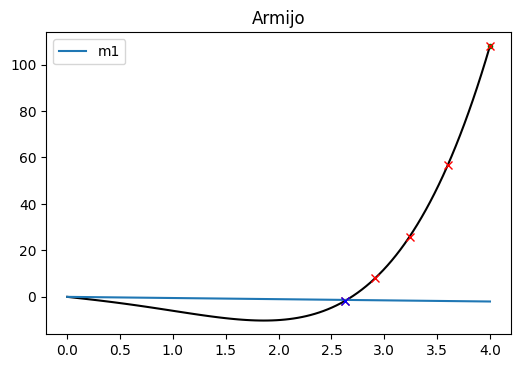

In [72]:
def LinesearchArmijo(q,dq,m1):    
    tl = 0
    tr = 0
    t = b
    qp = dq(0,v)
    q0 = fun(0,v)
    
    # Plotting
    uplim = max(q(a,v),q(b,v))+1   # set limits for the plot window
    dnlim = -3
    t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
    plt.figure(1)
    plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]
    
    
    xs = np.linspace(a,b)
    ys = q0+m1*qp*xs
    plt.plot(xs,ys,label="m1")
    qt = q(t,v)
    plt.plot(t,qt,'.g')
    while (1==1):
        qt = q(t,v)
        plt.plot(t,qt,'xr')
        print("Current bounds for the step: ",tl," ",tr)
        if ((qt-q0)/t<=(m1*qp)):
            # we found a good step: stop
            step=t   
            break
        if ((qt-q0)/t>(m1*qp)):
            # step too big
            tr = t
        if(tr==0):
            t = 2*tl
        else:
            eta = 0.9  # parameter for diminishing the step
            t = (1-eta)*tl+eta*tr
        if abs(tr-tl)<1e-15:
            # this situation should not occur
            # guard against infinite loops
            break
    plt.plot(t,q(t,v),'xb')
    plt.title('Armijo')
    plt.legend()
    plt.show()
    
LinesearchArmijo(fun,der,m1)


## Wolfe

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

Recall the three conditions for the **Wolfe line-search**

$\star$ $m_1,m_2 \in (0,1)$ are chosen constants such that $m_1<0.5$ and $m_2>0.5$.

(a) $\frac{q(t)-q(0)}{t} \leq m_1 q'(0)$ and $q'(t) \geq m_2 q'(0)$ (then we have a good $t$)
	
(b)  $\frac{q(t)-q(0)}{t}> m_1q'(0) $ (then $t$ is too big)
	
(c)  $\frac{q(t)-q(0)}{t}\leq m_1q'(0)$ and $q'(t) < m_2 q'(0)$ (then $t$ is too small)
</div>

Current bounds:  0   0
Step too small
Current bounds:  0.1   0
Step too small
Current bounds:  0.2   0
Step too small
Current bounds:  0.4   0
Step too small
Current bounds:  0.8   0
Found a good step:  1.6


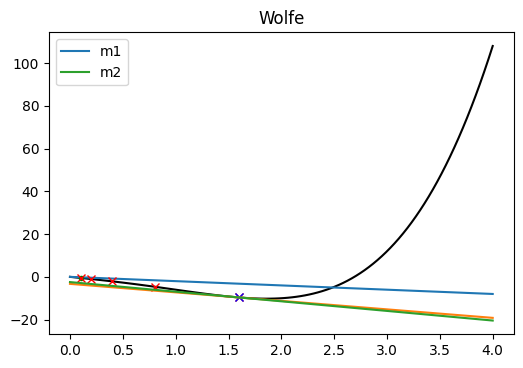

In [88]:
def LinesearchWolfe(q,dq,m1,m2):    
    tl = 0
    tr = 0
    t = 0.1
    qp = dq(0,v)
    q0 = fun(0,v)
    
    # Plotting
    uplim = max(fun(a,v),fun(b,v))+1   # set limits for the plot window
    dnlim = -3
    t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
    plt.figure(1)
    plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]
    
    
    xs = np.linspace(a,b)
    ys = q0+m1*qp*xs
    plt.plot(xs,ys,label="m1")
    qt = q(t,v)
    plt.plot(t,qt,'.g')
    
    
    while (1==1):
        qt = q(t,v)
        qprimet = dq(t,v)
        plt.plot(t,qt,'xr')
        print("Current bounds: ",tl," ",tr)

        if ((qt-q0)/t<=(m1*qp)) and qprimet>=m2*qp:
            step=t   # we found a good step
            print("Found a good step: ",t)
            break
        if ((qt-q0)/t>(m1*qp)):
            # step too big
            print("Step too big")

            tr = t
        if ((qt-q0)/t<=(m1*qp)) and qprimet<m2*qp:
            # step too small
            print("Step too small")
            tl = t
            
        if(tr==0):
            t = 2*tl
        else:
            t = 0.5*(tl+tr)
        

        if abs(tr-tl)<1e-15:
            print("Something wrong")
            break
        
    plt.plot(t,q(t,v),'xb')
    plt.plot(t1,q(t,v)+dq(t,v)*(t1-t))
    plt.plot(t1,q(t,v)+m2*qp*(t1-t),label="m2")
    
    plt.title('Wolfe')
    plt.legend()
    plt.show()

    


LinesearchWolfe(fun,der,0.4,0.9)
